In [1]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from numpy import genfromtxt

In [2]:
np.random.rand()

0.5488135039273248

In [228]:
import csv

with open('synthetic_data_2.csv', mode='w', newline='') as synthetic_file:
    employee_writer = csv.writer(synthetic_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    employee_writer.writerow(['Linearity', 'Lenency', "score"])
    
    for rows in range(100):
        employee_writer.writerow([np.random.rand(), np.random.rand(), 1.0])

[[0.71518937 0.60276338 0.54488318 0.4236548  0.64589411 0.43758721
  0.891773   0.96366276 0.38344152 0.79172504 0.52889492 0.56804456]
 [0.92559664 0.07103606 0.0871293  0.0202184  0.83261985 0.77815675
  0.87001215 0.97861834 0.79915856 0.46147936 0.78052918 0.11827443]
 [0.63992102 0.14335329 0.94466892 0.52184832 0.41466194 0.26455561
  0.77423369 0.45615033 0.56843395 0.0187898  0.6176355  0.61209572]
 [0.616934   0.94374808 0.6818203  0.3595079  0.43703195 0.6976312
  0.06022547 0.66676672 0.67063787 0.21038256 0.1289263  0.31542835]
 [0.36371077 0.57019677 0.43860151 0.98837384 0.10204481 0.20887676
  0.16130952 0.65310833 0.2532916  0.46631077 0.24442559 0.15896958]
 [0.11037514 0.65632959 0.13818295 0.19658236 0.36872517 0.82099323
  0.09710128 0.83794491 0.09609841 0.97645947 0.4686512  0.97676109]
 [0.60484552 0.73926358 0.03918779 0.28280696 0.12019656 0.2961402
  0.11872772 0.31798318 0.41426299 0.0641475  0.69247212 0.56660145]
 [0.26538949 0.52324805 0.09394051 0.575946

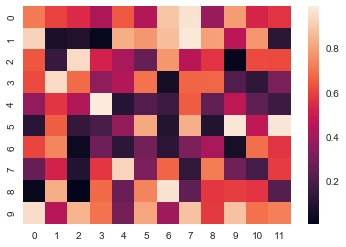

In [10]:
uniform_data = np.random.rand(10, 12)
print(uniform_data)
ax = sns.heatmap(uniform_data)

In [15]:
num_data = pd.read_csv('first_expressive_range.csv')
# num_data = pd.read_csv('crazy.csv')

In [16]:
num_data.columns

Index(['Lenency', 'Linearity', 'Similarity', 'NMesoPatterns',
       'NSpatialPatterns', 'Symmetry', 'Inner Similarity', 'Fitness', 'Score'],
      dtype='object')

In [192]:
num_data.head()

,Linearity,Lenency,score
0,0.0,0.0,3.0
1,0.2,0.0,35.0
2,0.4,0.0,2.0
3,0.6,0.0,1.0
4,0.8,0.0,1.0


In [193]:
num_data.dtypes

Linearity    float64
Lenency      float64
score        float64
dtype: object

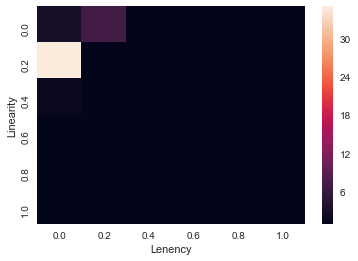

In [194]:
num_data = pd.read_csv('exp_tes2t.csv')
num_data_extra = num_data.pivot('Linearity', 'Lenency', 'score')
sns.heatmap(num_data_extra)

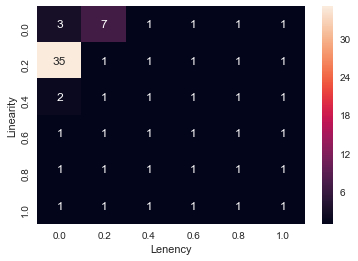

In [195]:
num_data = pd.read_csv('exp_tes2t.csv')
num_data_extra = num_data.pivot('Linearity', 'Lenency', 'score')
sns.heatmap(num_data_extra, annot=True)

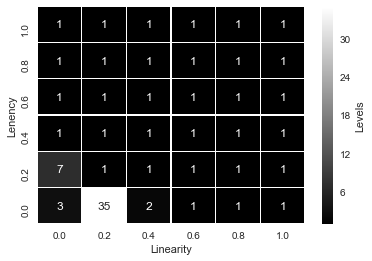

In [199]:
num_data = pd.read_csv('exp_tes2t.csv')
num_data_extra = num_data.pivot('Lenency', 'Linearity', 'score')
num_data_extra.sort_index(level=0, ascending=False, inplace=True)
sns.heatmap(num_data_extra, annot=True, xticklabels=1, linewidths=.3, cmap="gray", cbar_kws={'label': 'Levels'})

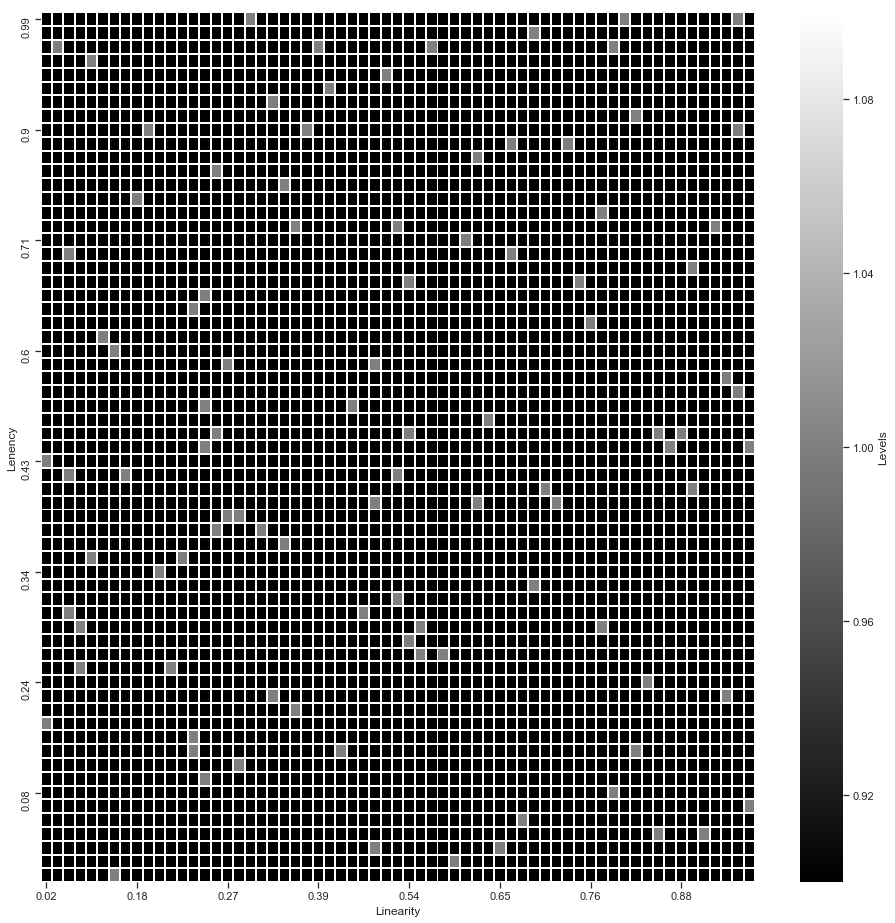

In [25]:
num_data = pd.read_csv('synthetic_data_2.csv')
num_data = num_data.round(2)
num_data_extra = num_data.pivot('Lenency', 'Linearity', 'score')
num_data_extra.sort_index(level=0, ascending=False, inplace=True)
plt.figure(figsize=(16, 16))
expressive_range = sns.heatmap(num_data_extra, yticklabels=8, xticklabels=8,linewidths=1, cmap="gray", cbar_kws={'label': 'Levels'})
expressive_range.set_facecolor('xkcd:black')

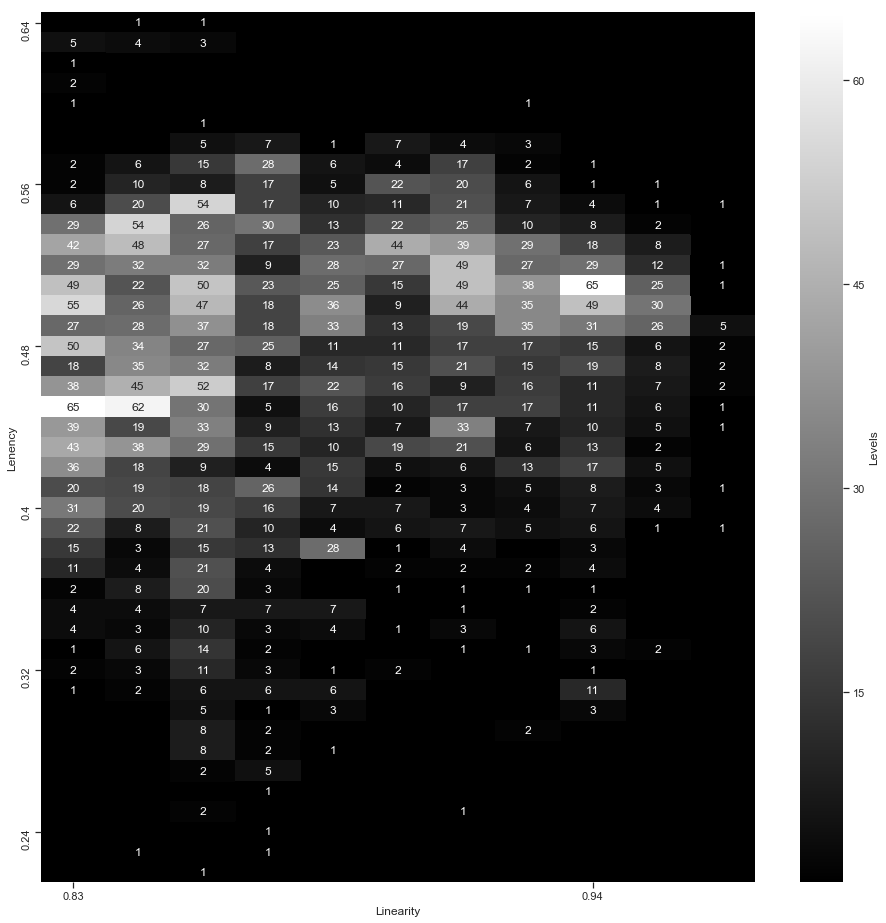

In [26]:
num_data = pd.read_csv('first_expressive_range.csv')
num_data = num_data.round(2)
num_data_extra = num_data.reset_index().pivot_table(values='Score', index=['Lenency'], columns='Linearity', aggfunc=np.sum)
num_data_extra.sort_index(level=0, ascending=False, inplace=True)
plt.figure(figsize=(16, 16))
#cmap="RdBu_r"
expressive_range = sns.heatmap(num_data_extra, yticklabels=8, xticklabels=8,linewidths=0, annot=True, cmap="gray", cbar_kws={'label': 'Levels'})
expressive_range.set_facecolor('xkcd:black')

In [ ]:
sns.set(style="ticks")
num_data = pd.read_csv('first_expressive_range.csv')
num_data = num_data.round(2)

num_data.columns

#BIG GRID

joint_kws=dict(gridsize=15)
expresive_range_plot = sns.jointplot(data=num_data, x="Similarity", y="Symmetry", kind="hex",cmap="gray", size=10, joint_kws= joint_kws)

#FOR THE COLOR BAR TO THE RIGHT

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
cbar_ax = expresive_range_plot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
# expresive_range_plot.ax_marg_x.set_xlim(0.0, 1.0)
# expresive_range_plot.ax_marg_y.set_ylim(0.0, 1.0)
expresive_range_plot.ax_marg_x.set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
expresive_range_plot.ax_marg_y.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# expresive_range_plot.ax_joint.legend_.remove()

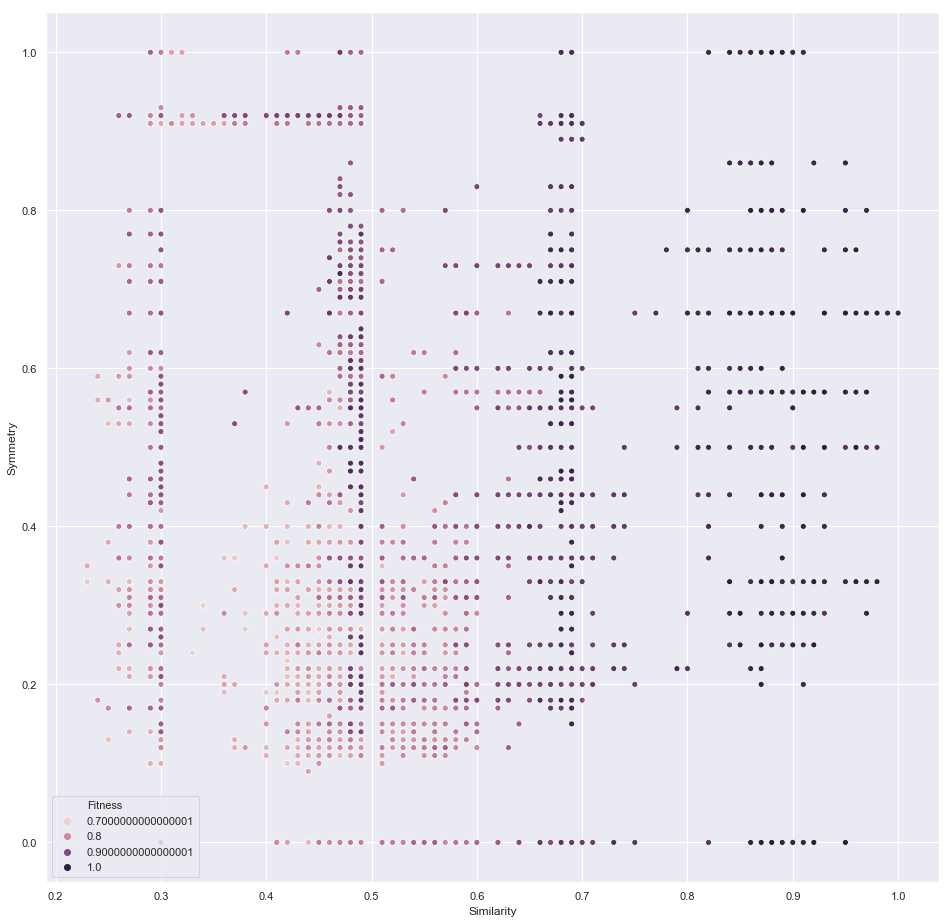

In [14]:
# sns.set(style="ticks")
sns.set()
num_data = pd.read_csv('first_expressive_range.csv')
num_data = num_data.round(2)

num_data.columns

#BIG GRID

joint_kws=dict(gridsize=15)
plt.figure(figsize=(16, 16))
#FOR THE COLOR BAR TO THE RIGHT
expresive_range_plot = sns.scatterplot(x="Similarity", y="Symmetry", hue="Fitness", data=num_data)
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
# cbar_ax = expresive_range_plot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
# plt.colorbar(cax=cbar_ax)

# expresive_range_plot.ax_marg_x.set_xlim(0.0, 1.0)
# expresive_range_plot.ax_marg_y.set_ylim(0.0, 1.0)
# expresive_range_plot.ax_marg_x.set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# expresive_range_plot.ax_marg_y.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# expresive_range_plot.ax_joint.legend_.remove()


plt.show()

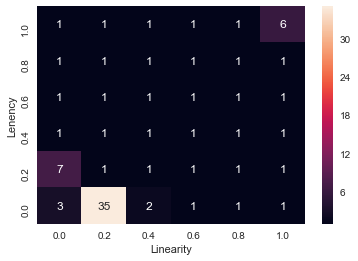

In [64]:
num_data_2 = pd.read_csv('exp_test.csv')
num_data_extra = num_data_2.reset_index().pivot_table(values='score', index=['Lenency'], columns='Linearity', aggfunc=np.sum)
num_data_extra.sort_index(level=0, ascending=False, inplace=True)
# num_data = num_data.pivot('linearity', 'lenency', 'score')
# my_data = genfromtxt('i_want_food.csv', delimiter=',')
# print(my_data)
sns.heatmap(num_data_extra, annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

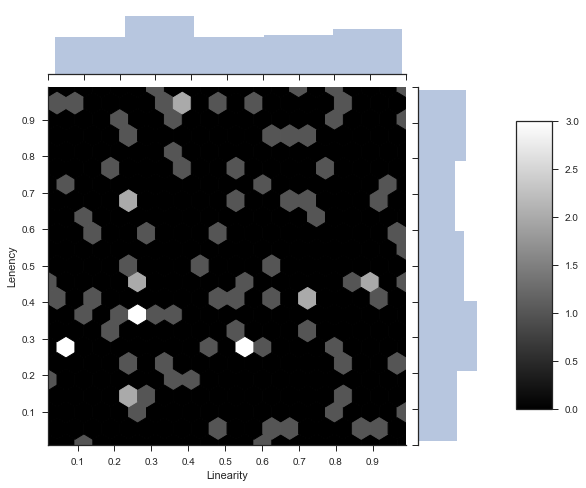

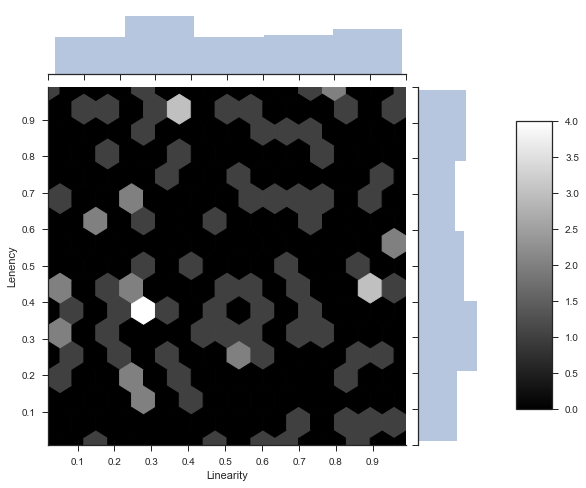

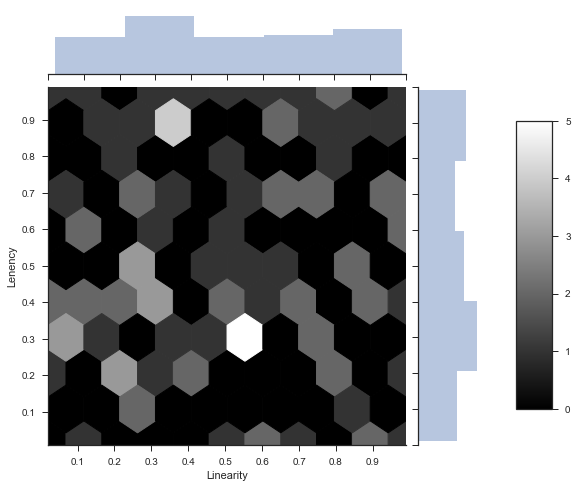

In [353]:
sns.set(style="ticks")
num_data = pd.read_csv('synthetic_data_2.csv')
num_data = num_data.round(2)

#BIG GRID

joint_kws=dict(gridsize=20)
expresive_range_plot = sns.jointplot(data=num_data, x="Linearity", y="Lenency", kind="hex",cmap="gray", size=10, joint_kws= joint_kws)

#FOR THE COLOR BAR TO THE RIGHT

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
cbar_ax = expresive_range_plot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)

expresive_range_plot.ax_marg_x.set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
expresive_range_plot.ax_marg_y.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
expresive_range_plot.ax_joint.legend_.remove()

#MEDIUM GRID

joint_kws=dict(gridsize=15)
expresive_range_plot = sns.jointplot(data=num_data, x="Linearity", y="Lenency", kind="hex",cmap="gray", size=10, joint_kws= joint_kws)

#FOR THE COLOR BAR TO THE RIGHT

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
cbar_ax = expresive_range_plot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)

expresive_range_plot.ax_marg_x.set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
expresive_range_plot.ax_marg_y.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
expresive_range_plot.ax_joint.legend_.remove()

#SMALLEST GRID

joint_kws=dict(gridsize=10)
# g = sns.jointplot(x="Linearity", y="Lenency", data=num_data,kind="hex", joint_kws= joint_kws)
# g = sns.jointplot(x="Linearity", y="Lenency", data=num_data)
expresive_range_plot = sns.jointplot(data=num_data, x="Linearity", y="Lenency", kind="hex",cmap="gray", size=10, joint_kws= joint_kws)

#FOR THE COLOR BAR TO THE RIGHT

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
cbar_ax = expresive_range_plot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)

# expresive_range_plot.ax_marg_x.set_xlim(0.0, 1.0)
expresive_range_plot.ax_marg_x.set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# expresive_range_plot.ax_marg_y.set_ylim(0.0, 1.0)
expresive_range_plot.ax_marg_y.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
expresive_range_plot.ax_joint.legend_.remove()

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


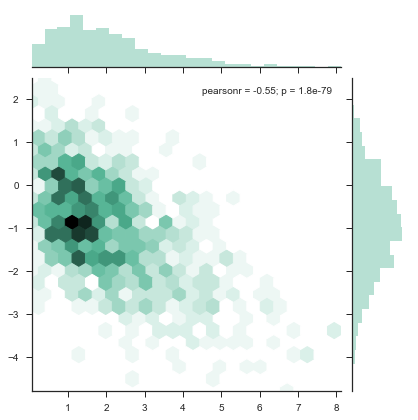

In [344]:
rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", color="#4CB391")